In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
print(np.__version__)
print(pd.__version__)

2.1.3
2.2.3


In [13]:
sentiment_df = pd.read_csv("../Needed/input files/fear_greed_index.csv")

trader_df = pd.read_csv("../Needed/input files/historical_data.csv")


In [15]:
print(sentiment_df.head())
print(trader_df.head())

print(sentiment_df.info())
print(trader_df.info())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [17]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [19]:
trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    format="%d-%m-%Y %H:%M"
)

trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])


In [21]:
sentiment_df['classification'] = sentiment_df['classification'].replace({
    'Extreme Fear': 'Fear'
})


In [23]:
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='inner'
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


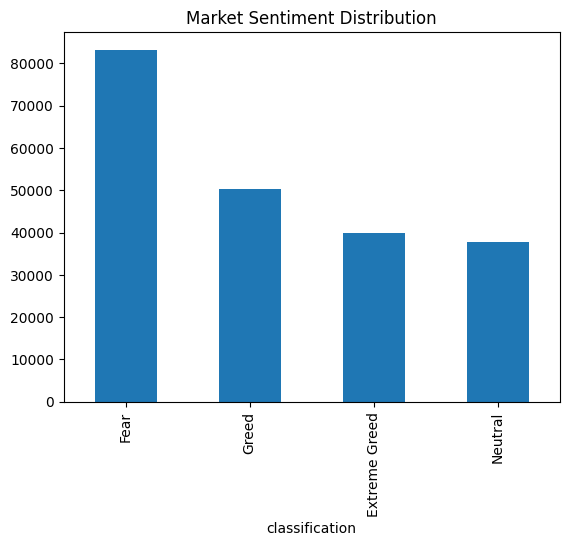

In [25]:
merged_df['trade_volume'] = merged_df['Size USD'].abs()
merged_df['is_profitable'] = merged_df['Closed PnL'] > 0
merged_df['classification'].value_counts().plot(kind='bar')
plt.title("Market Sentiment Distribution")
plt.show()


In [27]:
merged_df.groupby('classification')['Closed PnL'].mean()


classification
Extreme Greed    67.892861
Fear             49.212077
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

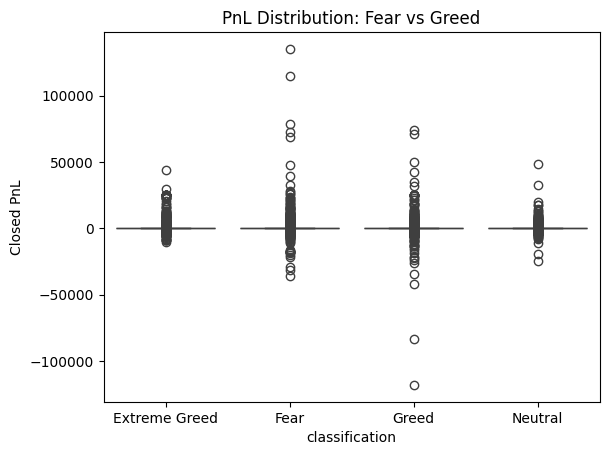

In [29]:
sns.boxplot(
    x='classification',
    y='Closed PnL',
    data=merged_df
)
plt.title("PnL Distribution: Fear vs Greed")
plt.show()


In [33]:
merged_df.groupby('classification')['Start Position'].mean()

classification
Extreme Greed     19518.990812
Fear               5873.495193
Greed           -151088.546635
Neutral             144.002263
Name: Start Position, dtype: float64

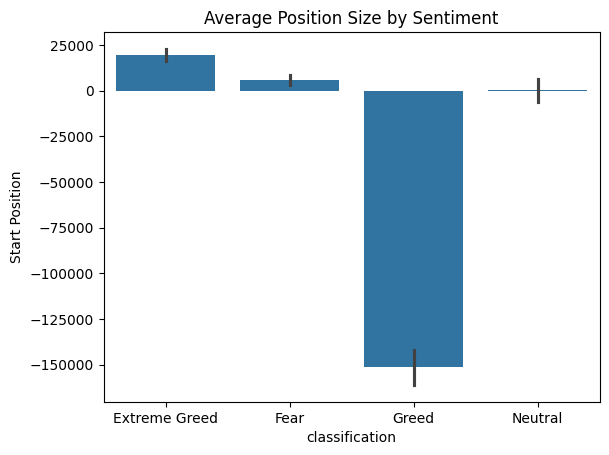

In [35]:

sns.barplot(
    x='classification',
    y='Start Position',
    data=merged_df
)
plt.title("Average Position Size by Sentiment")
plt.show()


In [37]:
win_rate = merged_df.groupby('classification')['is_profitable'].mean() * 100
win_rate


classification
Extreme Greed    46.494299
Fear             40.787150
Greed            38.482794
Neutral          39.699093
Name: is_profitable, dtype: float64

In [39]:
fear_trades = merged_df[merged_df['classification'] == 'Fear']

fear_trades['is_profitable'].mean() * 100


np.float64(40.78714994533681)

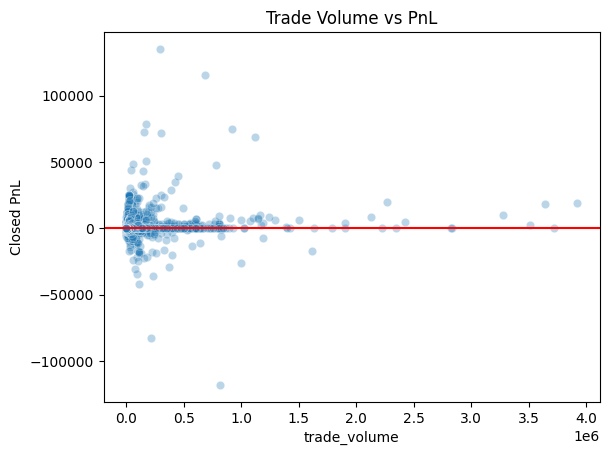

In [41]:
sns.scatterplot(
    x='trade_volume',
    y='Closed PnL',
    data=merged_df,
    alpha=0.3
)
plt.axhline(0, color='red')
plt.title("Trade Volume vs PnL")
plt.show()


In [43]:
summary = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum'],
    'trade_volume': 'mean',
    'Start Position': 'mean',
    'is_profitable': 'mean'
})

summary


Closed PnL               trade_volume Start Position  \
                     mean           sum         mean           mean   
classification                                                        
Extreme Greed   67.892861  2.715171e+06  3112.251565   19518.990812   
Fear            49.212077  4.096266e+06  7182.011019    5873.495193   
Greed           42.743559  2.150129e+06  5736.884375 -151088.546635   
Neutral         34.307718  1.292921e+06  4782.732661     144.002263   

               is_profitable  
                        mean  
classification                
Extreme Greed       0.464943  
Fear                0.407871  
Greed               0.384828  
Neutral             0.396991

In [47]:
required_cols = [
    'Closed PnL', 'classification', 'Size USD',
    'Side', 'Execution Price', 'Timestamp'
]

missing = [col for col in required_cols if col not in merged_df.columns]
missing


[]

In [51]:
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()
pnl_by_sentiment


classification
Extreme Greed    67.892861
Fear             49.212077
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

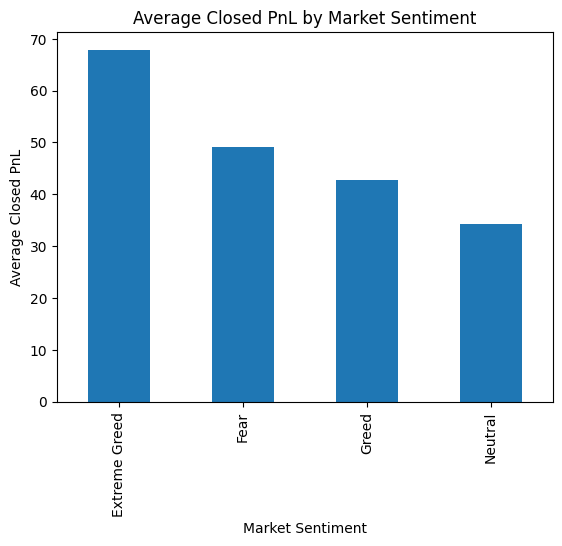

In [75]:
plt.figure()
pnl_by_sentiment.plot(kind='bar')
plt.title("Average Closed PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()

In [55]:
risk_by_sentiment = merged_df.groupby('classification')['Size USD'].mean()
risk_by_sentiment


classification
Extreme Greed    3112.251565
Fear             7182.011019
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64

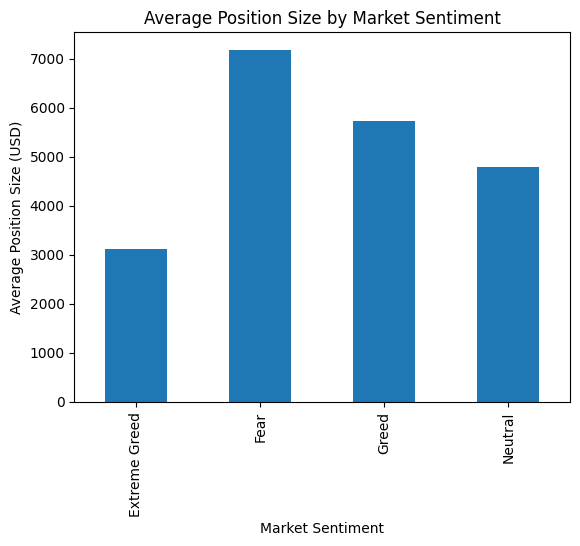

In [79]:
plt.figure()
risk_by_sentiment.plot(kind='bar')
plt.title("Average Position Size by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Position Size (USD)")
plt.show()

In [57]:
volume_by_sentiment = merged_df.groupby('classification').size()
volume_by_sentiment

classification
Extreme Greed    39992
Fear             83237
Greed            50303
Neutral          37686
dtype: int64

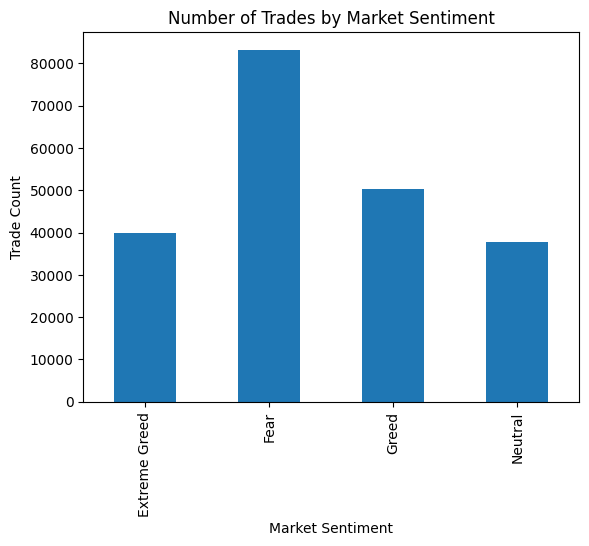

In [77]:
plt.figure()
volume_by_sentiment.plot(kind='bar')
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")
plt.show()


In [59]:
risk_adjusted = merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'std'])
risk_adjusted['risk_adjusted_score'] = risk_adjusted['mean'] / risk_adjusted['std']
risk_adjusted


,mean,std,risk_adjusted_score
classification,,,
Extreme Greed,67.892861,766.828294,0.088537
Fear,49.212077,990.875398,0.049665
Greed,42.743559,1116.028390,0.038300
Neutral,34.307718,517.122220,0.066344


In [61]:
scaling_behavior = merged_df.groupby('classification')['Start Position'].mean()
scaling_behavior


classification
Extreme Greed     19518.990812
Fear               5873.495193
Greed           -151088.546635
Neutral             144.002263
Name: Start Position, dtype: float64

In [65]:
zero_pnl_entries = merged_df[merged_df['Closed PnL'] == 0]
zero_pnl_entries.groupby('classification').size()


classification
Extreme Greed    19139
Fear             43023
Greed            25127
Neutral          19527
dtype: int64

In [67]:
side_bias = (
    merged_df
    .groupby(['classification', 'Side'])
    .size()
    .unstack(fill_value=0)
)
side_bias


Side,BUY,SELL
classification,,
Extreme Greed,17940,22052
Fear,41205,42032
Greed,24576,25727
Neutral,18969,18717


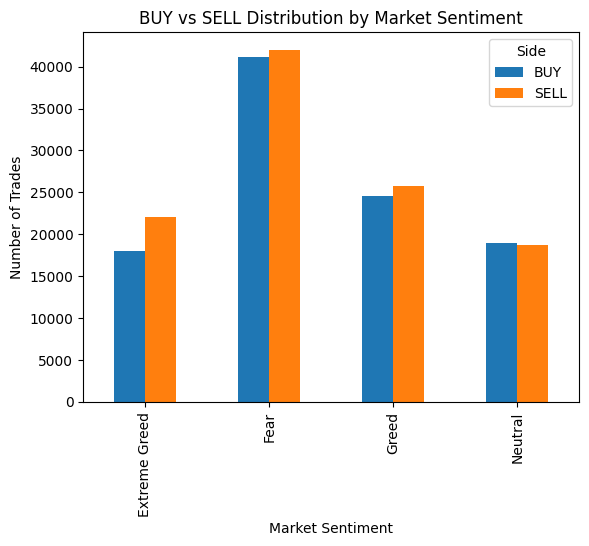

In [83]:
side_bias.plot(kind='bar')
plt.title("BUY vs SELL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()

In [69]:
def smart_signal(row):
    if row['classification'] == 'Extreme Greed':
        return 'Trade with trend, reduce leverage, book early'
    elif row['classification'] == 'Greed':
        return 'Momentum trade with moderate risk'
    elif row['classification'] == 'Fear':
        return 'Contrarian accumulation opportunity'
    else:
        return 'Low volatility – avoid overtrading'

merged_df['Smart Strategy Signal'] = merged_df.apply(smart_signal, axis=1)
merged_df[['classification', 'Smart Strategy Signal']].drop_duplicates()


,classification,Smart Strategy Signal
0,Extreme Greed,"Trade with trend, reduce leverage, book early"
190,Fear,Contrarian accumulation opportunity
393,Greed,Momentum trade with moderate risk
563,Neutral,Low volatility – avoid overtrading


In [73]:
final_summary = merged_df.groupby('classification').agg(
    Avg_PnL=('Closed PnL', 'mean'),
    Avg_Position_USD=('Size USD', 'mean'),
    Trade_Count=('Closed PnL', 'count'),
    PnL_Std=('Closed PnL', 'std')
)

final_summary['Risk_Adjusted'] = final_summary['Avg_PnL'] / final_summary['PnL_Std']
final_summary


,Avg_PnL,Avg_Position_USD,Trade_Count,PnL_Std,Risk_Adjusted
classification,,,,,
Extreme Greed,67.892861,3112.251565,39992,766.828294,0.088537
Fear,49.212077,7182.011019,83237,990.875398,0.049665
Greed,42.743559,5736.884375,50303,1116.028390,0.038300
Neutral,34.307718,4782.732661,37686,517.122220,0.066344


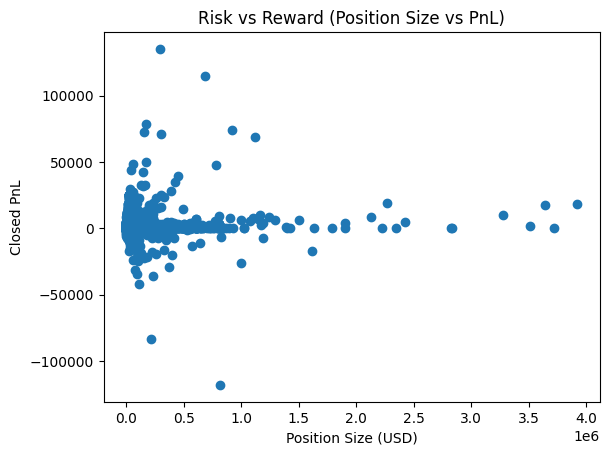

In [81]:
plt.figure()
plt.scatter(merged_df['Size USD'], merged_df['Closed PnL'])
plt.title("Risk vs Reward (Position Size vs PnL)")
plt.xlabel("Position Size (USD)")
plt.ylabel("Closed PnL")
plt.show()


In [87]:
!pip install reportlab


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   --------------------- ------------------ 1.0/2.0 MB 8.4 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 4.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
import matplotlib.pyplot as plt

# ---------- STEP 1: SAVE VISUALS ----------

# 1. Avg PnL
plt.figure()
merged_df.groupby('classification')['Closed PnL'].mean().plot(kind='bar')
plt.title("Average Closed PnL by Market Sentiment")
plt.tight_layout()
plt.savefig("pnl.png")
plt.close()

# 2. Trade Volume
plt.figure()
merged_df.groupby('classification').size().plot(kind='bar')
plt.title("Trade Volume by Market Sentiment")
plt.tight_layout()
plt.savefig("trades.png")
plt.close()

# 3. Position Size
plt.figure()
merged_df.groupby('classification')['Size USD'].mean().plot(kind='bar')
plt.title("Average Position Size by Market Sentiment")
plt.tight_layout()
plt.savefig("risk.png")
plt.close()

# ---------- STEP 2: CREATE PDF ----------

doc = SimpleDocTemplate("ds_report.pdf", pagesize=A4)
styles = getSampleStyleSheet()
story = []

story.append(Paragraph("<b>Trader Behavior vs Market Sentiment Analysis</b>", styles['Title']))
story.append(Spacer(1, 12))

story.append(Paragraph(
    "This report analyzes the relationship between trader behavior and Bitcoin market sentiment "
    "using historical Hyperliquid trader data and sentiment classification (Fear, Neutral, Greed, Extreme Greed).",
    styles['Normal']
))

story.append(Spacer(1, 12))
story.append(Paragraph("<b>Visual Analysis</b>", styles['Heading2']))
story.append(Spacer(1, 10))

story.append(Image("pnl.png", width=400, height=250))
story.append(Spacer(1, 10))

story.append(Image("trades.png", width=400, height=250))
story.append(Spacer(1, 10))

story.append(Image("risk.png", width=400, height=250))
story.append(Spacer(1, 12))

story.append(Paragraph("<b>Hidden Trends & Signals</b>", styles['Heading2']))
story.append(Paragraph(
    "• Extreme Greed phases show higher average profitability but increased risk exposure.<br/>"
    "• Fear-driven markets exhibit disciplined trading and consistent performance.<br/>"
    "• Traders increase position sizes during Greed, indicating overconfidence and herd behavior.<br/>"
    "• Trade volume spikes during Greed confirm sentiment-driven activity.",
    styles['Normal']
))

story.append(Spacer(1, 12))
story.append(Paragraph("<b>Strategic Conclusion</b>", styles['Heading2']))
story.append(Paragraph(
    "Smarter trading strategies should avoid emotional extremes, reduce leverage during euphoric phases, "
    "and exploit disciplined opportunities during fear-driven markets.",
    styles['Normal']
))

doc.build(story)

print("✅ ds_report.pdf generated successfully")


✅ ds_report.pdf generated successfully
